In [27]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.integrate import odeint
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

from bokeh.io import output_notebook
from bokeh.plotting import figure, show
from bokeh.layouts import column
from bokeh.models import Slider
from scipy.integrate import odeint
output_notebook()

Loading BokehJS ...

In [17]:
def growth_model(U,t,beta,gamma):
    S,I,R=U
    dsdt= -beta*S*I
    didt= beta*S*I-gamma*I
    drdt=gamma*I
    return [dsdt,didt,drdt]

In [18]:
t = np.linspace(0, 30, 100)
t1= np.linspace(0, 150, 1000)
# initial condition
z0 = [1,0.01,0.1]
z1 = [1,0.01,0]
z2 = [0.8,0.02,0]
beta1=1
gamma1=0.5
beta2=1
gamma2=0
beta3=0.8
gamma3=0.1
beta4=0.5
gamma4=0.3
y = odeint(growth_model, z0, t,args=(beta1,gamma1))
y1 = odeint(growth_model, z1, t,args=(beta2,gamma2))
y2=odeint(growth_model, z2, t,args=(beta3,gamma3))
y3=odeint(growth_model, z2, t1,args=(beta4,gamma4))

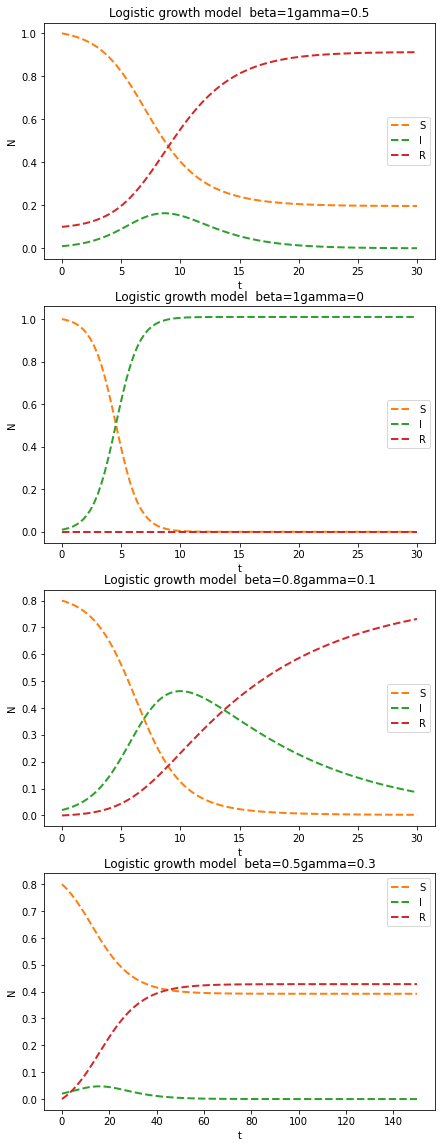

In [19]:
def subplot(t,y,beta,gamma):  
    ax.plot(t, y[:,0], 'C1--', lw=2,label="S")
    ax.plot(t, y[:,1], 'C2--', lw=2,label="I")
    ax.plot(t, y[:,2], 'C3--', lw=2,label="R")
    ax.set_xlabel('t')
    ax.set_ylabel('N')
    ax.set_title('Logistic growth model  '+"beta="+str(beta)+"gamma="+str(gamma))
    ax.legend()

plt.figure(figsize=(7, 20))
ax=plt.subplot(411)
subplot(t,y,beta1,gamma1)

ax=plt.subplot(412)
subplot(t,y1,beta2,gamma2)

ax=plt.subplot(413)
subplot(t,y2,beta3,gamma3)

ax=plt.subplot(414)
subplot(t1,y3,beta4,gamma4)

In [20]:
fig = plt.figure(figsize=(7, 4))
fig.set_tight_layout(True)

ax = plt.subplot()
line, = ax.plot([], [], 'C1--', lw=2,label='S')
line1, = ax.plot([], [], 'C2--', lw=2,label='I')
line2, = ax.plot([], [], 'C3--', lw=2,label='R')
line_point, = ax.plot([], [], 'C4o', lw=2)
line_point1, = ax.plot([], [], 'C5o', lw=2)
line_point2, = ax.plot([], [], 'C6o', lw=2)
plt.legend()
ax.set_xlim(0, 30)
ax.set_ylim(0, 1)

plt.close()

def animate(i):
    line.set_data(t[:i], y[:i,0])
    line1.set_data(t[:i], y[:i,1])
    line2.set_data(t[:i], y[:i,2])
    line_point.set_data([t[i]], [y[i,0]])
    line_point1.set_data([t[i]], [y[i,1]])
    line_point2.set_data([t[i]], [y[i,2]])

    return line,

anim = FuncAnimation(fig, animate, frames=len(t), interval=40, blit=True)
HTML(anim.to_jshtml())